In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('iris.csv')
df.shape

(150, 6)

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# removing id col
df = df.iloc[:,1:]

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
df['Species'] = encoder.fit_transform(df['Species'])

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [19]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

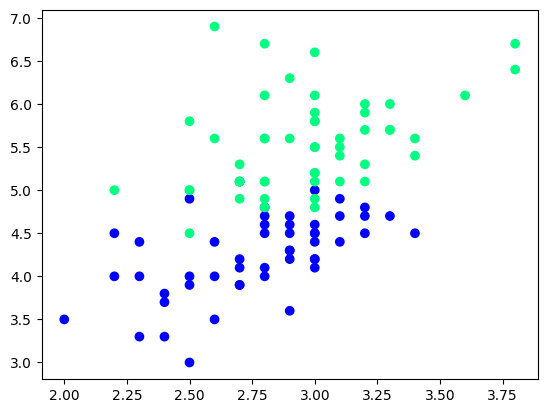

In [21]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [23]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
68,2.2,4.5,1
89,2.5,4.0,1
99,2.8,4.1,1
98,2.5,3.0,1
50,3.2,4.7,1
62,2.2,4.0,1
75,3.0,4.4,1
94,2.7,4.2,1
107,2.9,6.3,2


In [24]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [25]:
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
117,3.8,6.7,2
93,2.3,3.3,1
128,2.8,5.6,2
91,3.0,4.6,1
136,3.4,5.6,2
130,2.8,6.1,2
101,2.7,5.1,2
95,3.0,4.2,1
60,2.0,3.5,1


In [26]:
df_val

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
58,2.9,4.6,1
84,3.0,4.5,1
54,2.8,4.6,1
108,2.5,5.8,2


In [27]:
df_test

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
53,2.3,4.0,1
129,3.0,5.8,2
138,3.0,4.8,2
103,2.9,5.6,2


In [28]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [29]:
y_test

array([1, 1, 1, 1, 2])

# Case 1 - Bagging

In [30]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
128,2.8,5.6,2
60,2.0,3.5,1
60,2.0,3.5,1
95,3.0,4.2,1
60,2.0,3.5,1
118,2.6,6.9,2
101,2.7,5.1,2


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
dt_bag1 = DecisionTreeClassifier()

In [34]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


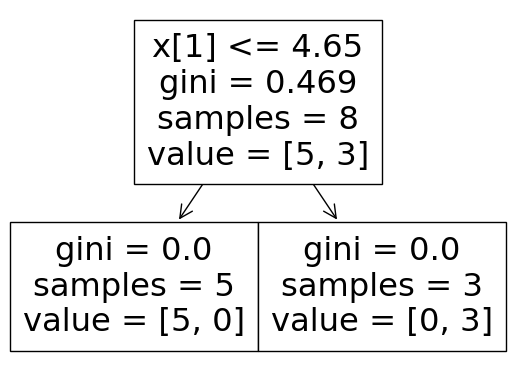

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


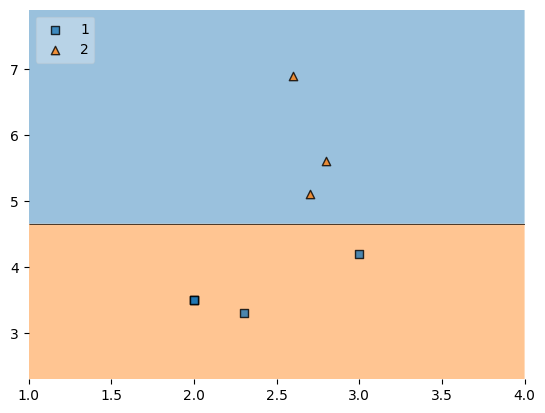

In [35]:
evaluate(dt_bag1,X,y)

In [36]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
101,2.7,5.1,2
95,3.0,4.2,1
130,2.8,6.1,2
130,2.8,6.1,2
93,2.3,3.3,1
95,3.0,4.2,1
118,2.6,6.9,2


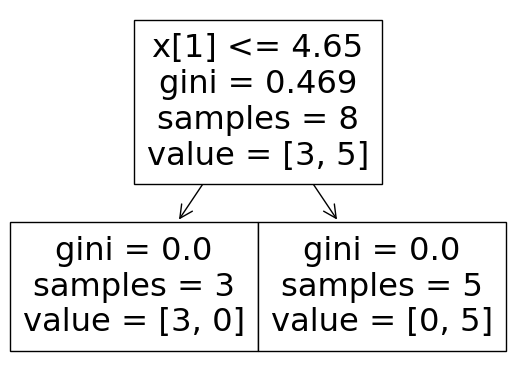

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


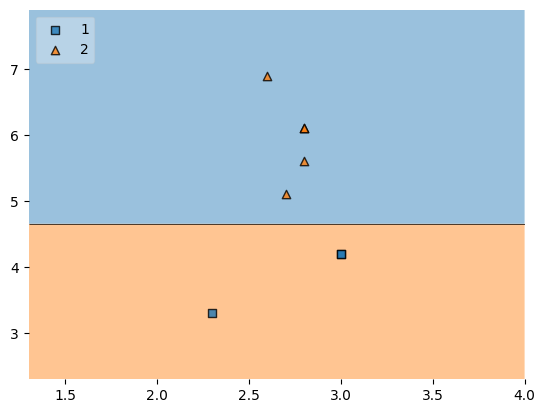

In [37]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [38]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
130,2.8,6.1,2
101,2.7,5.1,2
130,2.8,6.1,2
101,2.7,5.1,2
91,3.0,4.6,1
136,3.4,5.6,2
136,3.4,5.6,2


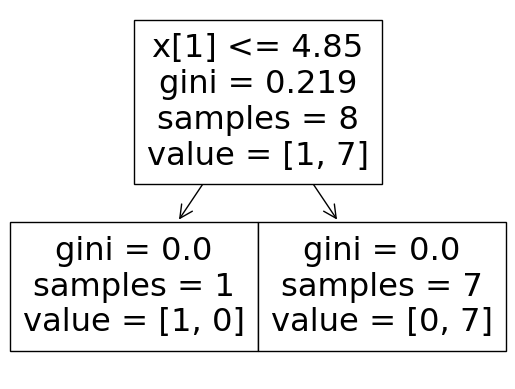

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


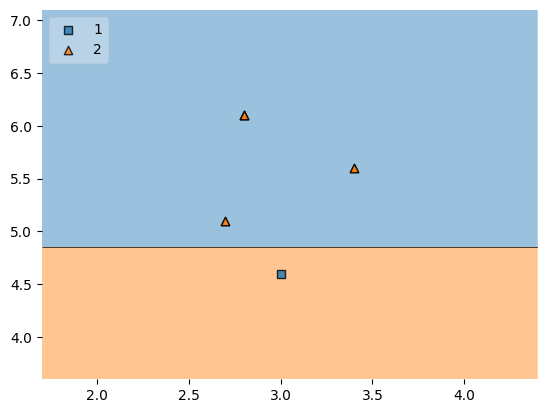

In [39]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [40]:
df_test

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
53,2.3,4.0,1
129,3.0,5.8,2
138,3.0,4.8,2
103,2.9,5.6,2


In [41]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [42]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
117,3.8,6.7,2
93,2.3,3.3,1
128,2.8,5.6,2
91,3.0,4.6,1
136,3.4,5.6,2
130,2.8,6.1,2
101,2.7,5.1,2
95,3.0,4.2,1
60,2.0,3.5,1


In [43]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
117,3.8,6.7,2
93,2.3,3.3,1
128,2.8,5.6,2
91,3.0,4.6,1
118,2.6,6.9,2
95,3.0,4.2,1
60,2.0,3.5,1


# Random Subspaces

column samping

In [44]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [45]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,102,5.8,2.7,5.1,1.9,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa


In [46]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,SepalLengthCm
101,2.7,5.8
12,3.0,4.8
23,3.3,5.1
14,4.0,5.8
128,2.8,6.4
78,2.9,6.0
47,3.2,4.6
137,3.1,6.4
15,4.4,5.7
13,3.0,4.3


# Random Patches

combine samping(row and cplumn/feature)

In [47]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,102,5.8,2.7,5.1,1.9,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa


In [48]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,SepalLengthCm
12,3.0,4.8
14,4.0,5.8
12,3.0,4.8
78,2.9,6.0
12,3.0,4.8
78,2.9,6.0
137,3.1,6.4
23,3.3,5.1
